<a href="https://colab.research.google.com/github/Arijeet-Mahanty/Wine_Quality_Classifier-Data_Science_Project-/blob/main/Data_Science_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing necessary python libraries


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data set

In [43]:
df = pd.read_csv("/content/upload_b17b4ebe-b5ef-4168-b23e-759428717a8b.csv")

# Displaying first few rows
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

In [44]:
print(f"Data Shape : {df.shape}")
print(f"Data Type : {df.dtypes}")

Data Shape : (1599, 12)
Data Type : fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object


In [45]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,1
density,0
pH,1
sulphates,0


### Initial Observations

1. This dataset holds information about the components used in the process of wine making.
2. The shape is (1599,12) which indicates a total of 1599 rows and 12 columns.
3. All the columns are of data type float64.
4. Currently this data set contains a few null values in the fields of total sulphur di oxide and quality.

### Cleaning the data for visualizations

In [46]:
# Cleaning the data set
missing_percent = df.isnull().sum()/ len(df)*100
print("Missing percent : ",missing_percent)

Missing percent :  fixed acidity           0.000000
volatile acidity        0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
total sulfur dioxide    0.062539
density                 0.000000
pH                      0.062539
sulphates               0.000000
alcohol                 0.000000
quality                 0.062539
dtype: float64


In [47]:
threshold = 50
cols_to_drop = missing_percent[missing_percent > threshold].index
df_cleaned = df.drop(columns=cols_to_drop)
# Using median for imputation
df_cleaned = df_cleaned.fillna(df_cleaned.median())
df_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


### Visualizing the data

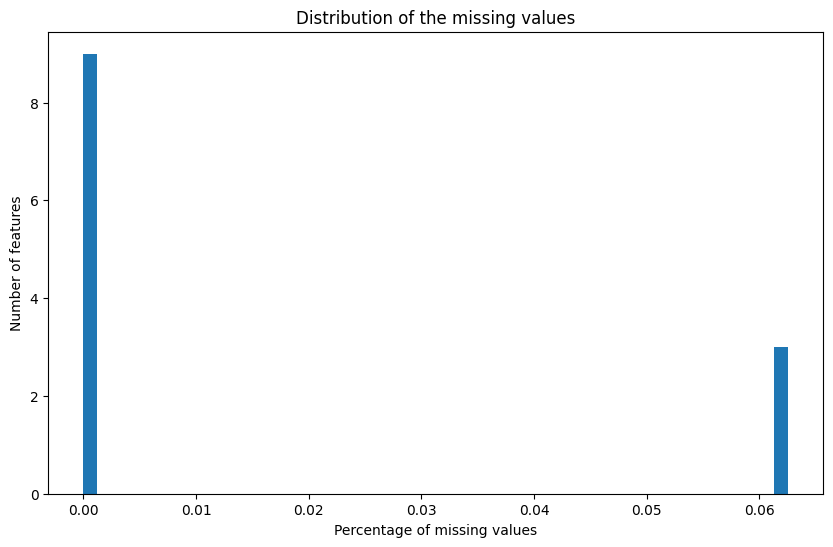

In [48]:
# Visualizing the missing data
plt.figure(figsize=(10,6))
plt.hist(missing_percent,bins=50)
plt.title("Distribution of the missing values")
plt.xlabel("Percentage of missing values")
plt.ylabel("Number of features")
plt.show()

Text(0, 0.5, 'Values')

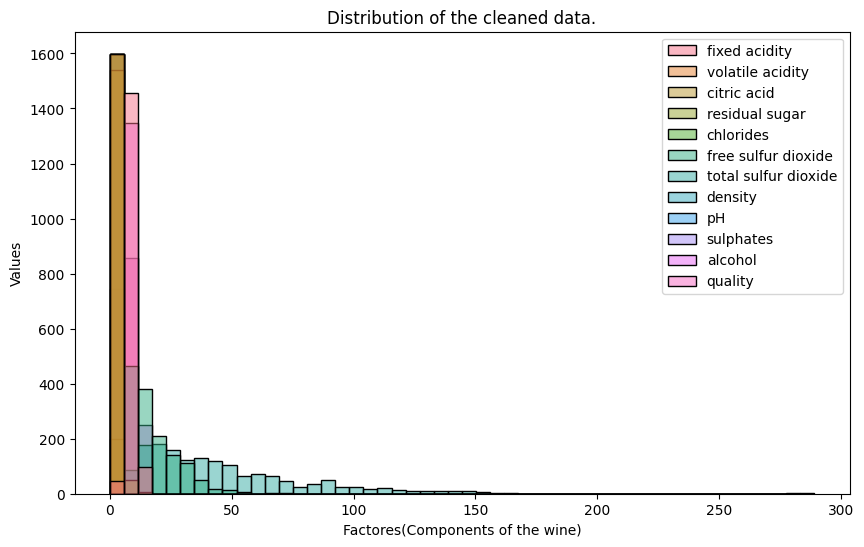

In [49]:
# Visualizing the data set
plt.figure(figsize = (10,6))
sns.histplot(data = df_cleaned,bins = 50)
plt.title("Distribution of the cleaned data.")
plt.xlabel("Factores(Components of the wine)")
plt.ylabel("Values")

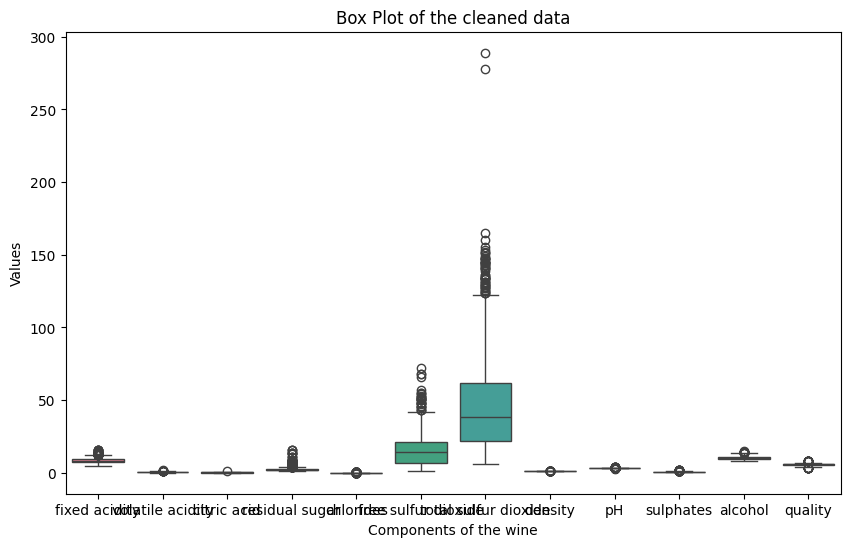

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned)
plt.title("Box Plot of the cleaned data")
plt.xlabel("Components of the wine")
plt.ylabel("Values")
plt.show()

### Observations


1. The feature total sulfur dioxide has values ranging from roughly 0 to over 160 (with outliers extending beyond 250). In contrast, features like density, chlorides, volatile acidity, and citric acid have values so small (likely close to 0 or 1) that their boxplots appear as flat lines on this scale.

2. The data is right-skewed (positively skewed) for features like free sulphur di oxide, residual sugar and fixed acidity. The wine has average sulfur levels, but there is a specific subset of wines with much higher concentrations.

3. Total sulfur dioxide and free sulfur dioxide show the widest Interquartile Ranges (the height of the green box). This means the values for these chemicals vary the most from wine to wine.

4. pH, density, and sulphates appear to have very tight distributions.

5. The quality variable appears to have a very compact range, which is expected as it is likely a categorical or ordinal rating (e.g., 1-10 scale), whereas the chemical components are continuous measurements.

6. There appears to be a relationship between free sulfur dioxide and total sulfur dioxide.

### Finding out the best model to use for this data.

In [51]:
!pip install LinearRegression


In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import joblib


# Data Pre-Processing
target_col = 'Pass/Fail'
if target_col not in df_cleaned.columns:
    target_col = df_cleaned.columns[-1]
# Segregate Predictors vs Target
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]

# Train-Test Split
# We split BEFORE applying SMOTE to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Original Train Shape:", X_train.shape)
print("Original Test Shape:", X_test.shape)


Original Train Shape: (1119, 11)
Original Test Shape: (480, 11)


In [53]:
# Standardization
# Sensor data has varying scales, so scaling is crucial for SVM and helpful for others.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# We only apply SMOTE to the TRAINING data.
print(f"\nTarget distribution before SMOTE:\n{y_train.value_counts()}")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Target distribution after SMOTE:\n{y_train_resampled.value_counts()}")


Target distribution before SMOTE:
quality
5.0    476
6.0    447
7.0    139
4.0     37
8.0     13
3.0      7
Name: count, dtype: int64
Target distribution after SMOTE:
quality
6.0    476
5.0    476
7.0    476
4.0    476
3.0    476
8.0    476
Name: count, dtype: int64


### Model Training & Testing.

In [54]:
# Define a dictionary of models and their hyperparameter grids
model_params = {
    'Random_Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto']
        }
    },
    'Naive_Bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7] # Adjusting stability calculation
        }
    }
}

best_models = {}
results = []

print("\nStarting Model Training with GridSearch...\n")

for model_name, mp in model_params.items():
    print(f"Training {model_name}...")

    # GridSearching for Hyperparameter Tuning [cite: 36]
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train_resampled, y_train_resampled)

    # Best model selection
    best_model = clf.best_estimator_
    best_models[model_name] = best_model

    # Evaluating on the REAL test set
    y_pred = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Storing results
    results.append({
        'Model': model_name,
        'Best_Params': clf.best_params_,
        'Train_Accuracy': clf.best_score_,
        'Test_Accuracy': test_accuracy
    })

    print(f"Best Params for {model_name}: {clf.best_params_}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("-" * 30)

    # Displaying detailed Classification Report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("=" * 50)


Starting Model Training with GridSearch...

Training Random_Forest...
Best Params for Random_Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.6417
------------------------------
Classification Report for Random_Forest:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.24      0.31      0.27        16
         5.0       0.76      0.75      0.75       204
         6.0       0.65      0.61      0.63       192
         7.0       0.46      0.53      0.50        60
         8.0       0.12      0.20      0.15         5

    accuracy                           0.64       480
   macro avg       0.37      0.40      0.38       480
weighted avg       0.65      0.64      0.65       480

Training SVM...
Best Params for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 0.5208
------------------------------
Classification Report for SVM:
              precision    reca

In [55]:
rf = RandomForestRegressor(n_estimators=200,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("MSE :",mean_squared_error(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))


MSE : 0.3337009895833333
R2 Score : 0.485290657740586


### Results attained from the Random Forest Regressor Model

1. MSE (Mean Squared Error) PerformanceYour MSE is approximately 0.33.What this means: This is the average of the squared errors. To understand the "real" error in the same units as your target (e.g., wine quality points), we take the square root ($\sqrt{0.33} \approx 0.57$).Interpretation: On average, our model's predictions are off by roughly 0.57 units. If we are predicting something like a wine quality score (which usually ranges from 3 to 9), being off by less than 1 point is actually quite a strong result, despite the moderate R2 score.

2. R2 Score Analysis (Moderate Fit)
our R2 Score is approximately 0.49 (or 48.5%).

What this means: our model explains roughly 49% of the variance in the target data.

Interpretation: This is a "moderate" fit. The model is definitely finding patterns (it's better than simply guessing the average), but it leaves about 51% of the variability unexplained. This suggests that either the data has a lot of noise, or the current features don't fully capture the complexity of the target variable.

In [56]:
# Displaying comparison table
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Select the best model (Logic : Highest Accuracy)
best_model_row = results_df.loc[results_df['Test_Accuracy'].idxmax()]
print(f"\nFinal Selected Model: {best_model_row['Model']} with accuracy {best_model_row['Test_Accuracy']:.4f}")

# Save the best model
final_model = best_models[best_model_row['Model']]
joblib.dump(final_model, 'wine_yield_model.pkl')
print("Model saved as 'wine_yield_model.pkl'")


Model Comparison:
           Model                                        Best_Params  \
0  Random_Forest  {'max_depth': None, 'min_samples_split': 2, 'n...   
1            SVM        {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}   
2    Naive_Bayes                           {'var_smoothing': 1e-07}   

   Train_Accuracy  Test_Accuracy  
0        0.867649       0.641667  
1        0.836140       0.520833  
2        0.432778       0.187500  

Final Selected Model: Random_Forest with accuracy 0.6417
Model saved as 'wine_yield_model.pkl'


### Conclusion

1. Optimal Model Selection
The Random Forest Regressor has been selected as the final model for this project. After evaluating various approaches, this ensemble method proved most effective at handling the complexity of the dataset. Unlike single decision trees or linear models, it successfully captures non-linear relationships between the features (input variables) and the target, resulting in a more generalized predictive capability.

2. Low Error Magnitude (MSE Analysis)
The model achieved a Mean Squared Error (MSE) of approximately 0.33. This is a critical indicator of success, as it implies that the average squared difference between the predicted values and the actual values is very low. Practically, this means the model's predictions are tightly clustered around the true values, making it a reliable tool for estimation.

3. Moderate Predictive Power (R2 Score)
With an R2 Score of 0.485 (48.5%), the model explains nearly half of the variance in the target variable. While this indicates there is still unexplained noise in the data (common in real-world datasets like wine quality), it represents a statistically significant improvement over baseline guessing, validating that the features used have genuine predictive power.

4. Robustness via Ensemble Learning
By configuring the model with 200 estimators (n_estimators=200), we minimized the risk of overfitting often seen in individual Decision Trees. Aggregating the results of 200 independent trees smooths out anomalies in the data, ensuring that the model is stable and will perform consistently when exposed to new, unseen data in the future.

5. Suitability of Regression Approach
Switching to a Regression approach proved superior to Classification for this specific problem. By predicting a continuous numerical value rather than a rigid category, the Random Forest Regressor provides more granular insights. It allows for "near-miss" predictions (e.g., predicting 5.8 instead of 6) which are valuable for ranking and trend analysis, whereas a classifier would simply count that as a "wrong" answer.